# Kaggle Titanic Demo1.1.1 AdaBoosting

In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering6 import feature_engineering
from plot_learning_curve import plot_learning_curve

Kaggle_train=pd.read_csv('data/train.csv', sep=',')
Kaggle_test=pd.read_csv('data/test.csv', sep=',')

df_train, df_test = feature_engineering(Kaggle_train, Kaggle_test)

feature= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

# Acc: 0.886 +/- 0.017, F1: 0.842 +/- 0.025 # with max_depth = 4
# KS-0.81340 by max_depth=3

X, y = df_train[feature], Kaggle_train['Survived']

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


In [2]:
df_train.columns

Index([u'Age', u'HasAge', u'Pclass', u'Fare_', u'Fare_b', u'HasFamily',
       u'SibSp', u'Parch', u'FamilySize', u'FamilySurvived', u'FamilyDied',
       u'Age_s_adult', u'Age_s_elder', u'Age_s_young', u'Sex_female',
       u'Sex_male', u'Title_s_Master', u'Title_s_Miss', u'Title_s_Mr',
       u'Title_s_Mrs', u'Title_Age_s_adult', u'Title_Age_s_elder',
       u'Title_Age_s_young', u'Embarked__C', u'Embarked__Q', u'Embarked__S',
       u'Cabin_s_G', u'Cabin_s_M', u'Cabin_s_X'],
      dtype='object')

In [3]:
X.head()

,Pclass,FamilySurvived,FamilyDied,Title_s_Master,Title_s_Miss,Title_s_Mr,Title_s_Mrs
0,3,0,2,0,0,1,0
1,1,1,0,0,0,0,1
2,3,0,0,0,1,0,0
3,1,1,1,0,0,0,1
4,3,0,0,0,0,1,0


In [4]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Train, Test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
clf = AdaBoostClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    random_state=0
)


In [7]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=1000, random_state=0)

In [8]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

Training Acc: 0.893
Training Precision: 0.810
Training Recall: 0.897
Training F1: 0.852


In [9]:
print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

Test Acc: 0.849
Test Precision: 0.753
Test Recall: 0.859
Test F1: 0.803


## Model evaluation

In [10]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for Acc: 0.886 +/- 0.016


In [11]:
scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Cross validation check for F1: 0.841 +/- 0.023


In [12]:
from plot_learning_curve import plot_learning_curve

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

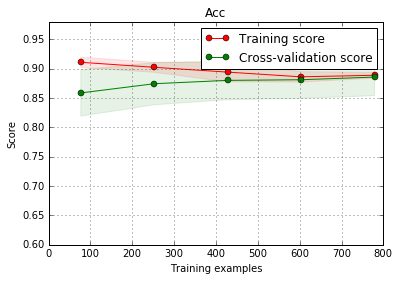

In [13]:
plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

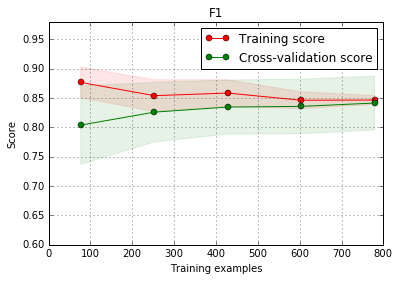

In [14]:
plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

## Prediction

In [15]:
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=1000, random_state=0)

In [16]:
predictions = clf.predict(df_test[feature])

In [17]:
submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.1.1-AdaBoost.csv", index=False)

### This gives Kaggle score: 0.73


# GradientBoostingClassifier

In [18]:
clf = GradientBoostingClassifier(
    n_estimators=100, ## 1000 won't make difference
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)
clf.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

Training Acc: 0.899
Training Precision: 0.818
Training Recall: 0.905
Training F1: 0.859
Test Acc: 0.866
Test Precision: 0.753
Test Recall: 0.902
Test F1: 0.821
Cross validation check for Acc: 0.887 +/- 0.016
Cross validation check for F1: 0.842 +/- 0.024


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

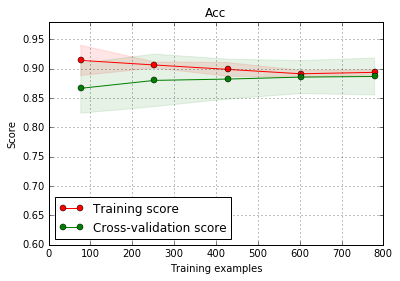

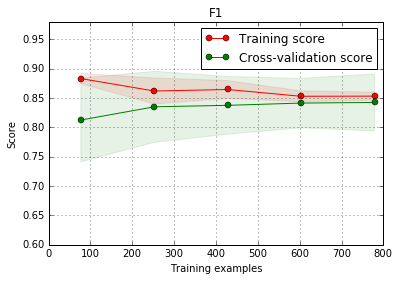

In [19]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

In [20]:
clf.fit(X, y)
predictions = clf.predict(df_test[feature])

submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.1.1-GradientBoostingClassifier.csv", index=False)

### This gives Kaggle score: 0.736, why?

# ExtraTreesClassifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(
    n_estimators=100, 
    max_depth=10,  
    min_samples_split=2, 
    random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Training Acc: 0.899
Training Precision: 0.818
Training Recall: 0.905
Training F1: 0.859
Test Acc: 0.866
Test Precision: 0.753
Test Recall: 0.902
Test F1: 0.821
Cross validation check for Acc: 0.884 +/- 0.016
Cross validation check for F1: 0.840 +/- 0.024


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

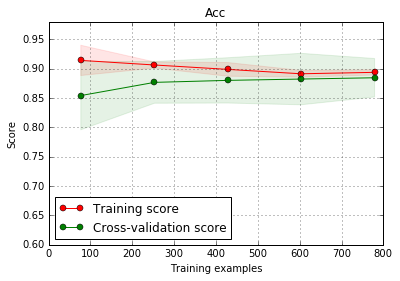

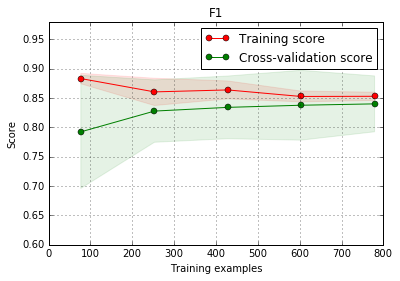

In [22]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

In [23]:
clf.fit(X, y)
predictions = clf.predict(df_test[feature])

submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.1.1-ExtraTreesClassifier.csv", index=False)

### Kaggle score above: 0.77

# BaggingClassifier

In [24]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

clf = BaggingClassifier(
    base_estimator=tree,
    n_estimators=500,
    #max_samples=2,
    #max_features=5,
    bootstrap=True,
    bootstrap_features=False,
    random_state=1
)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

Training Acc: 0.896
Training Precision: 0.818
Training Recall: 0.898
Training F1: 0.856
Test Acc: 0.866
Test Precision: 0.753
Test Recall: 0.902
Test F1: 0.821
Cross validation check for Acc: 0.886 +/- 0.016
Cross validation check for F1: 0.842 +/- 0.024


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

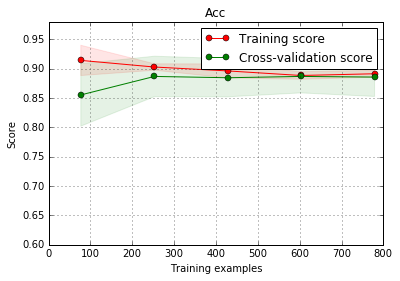

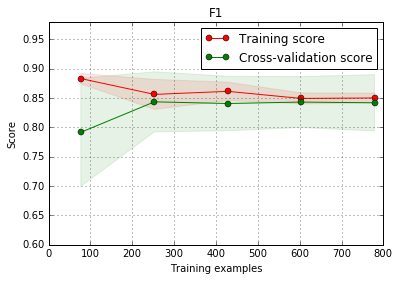

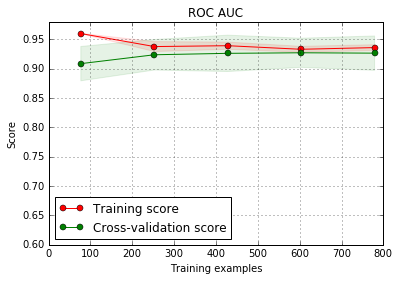

In [25]:
print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))

scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

plot_learning_curve(clf, 'ROC AUC', X, y, ylim=(0.6, 0.98), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='roc_auc')

In [26]:
clf.fit(X, y)
predictions = clf.predict(df_test[feature])

submission = pd.DataFrame({
        "PassengerId": Kaggle_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv("Demo1.1.1-BaggingClassifier.csv", index=False)

### This gives Kaggle score: 0.765